In [129]:
import gzip
from tqdm import tqdm, trange
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
import plotly.express as px

In [46]:
places_file = "places.clean.json.gz"
users_file = "users.clean.json.gz"
reviews_file = "reviews.clean.json.gz"

In [47]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [93]:
places_data = []
users_data = []
reviews_data = []

In [96]:
ct = 0
for l in tqdm(parse(places_file)):
    places_data.append(l)
    # ct += 1
    # if (ct == 50000):
    #     break

3114353it [06:01, 8603.23it/s] 


In [49]:
ct1 = 0
for l in (parse(users_file)):
    users_data.append(l)
    ct1 += 1
    if (ct1 == 100):
        break

In [50]:
ct2 = 0
for l in (parse(reviews_file)):
    reviews_data.append(l)
    ct2 += 1
    if (ct2 == 100):
        break

In [70]:
users_data[5]

{'userName': 'Jacquelyn Dorris',
 'jobs': [['PS Medical Supplies, Inc.',
   'Customer Service',
   [[1, 1, 2012], [1, 1, 2013], 1],
   '',
   '']],
 'currentPlace': ['Pomona, CA', [[], 340552270, -1177523050, 1]],
 'previousPlaces': [['Upland, Ca', [[], 340975100, -1176483880, 1]],
  ['Azusa, CA', [[], 341336190, -1179075630, 1]],
  ['Rancho Cucamonga, CA', [[], 341063990, -1175931080, 1]]],
 'education': [[[], [], [], [], [], 6],
  [['Upland High School', '', [[1, 1, 2008], [1, 1, 2012]], '', '']]],
 'gPlusUserId': '100000035085750632094'}

In [97]:
gps_coordinates = []
for place in places_data:
    if (place["gps"] != None and len(place["gps"]) != 0):
        gps_coordinates.append(place["gps"])

In [98]:
import reverse_geocode

In [118]:
location = reverse_geocode.search(gps_coordinates)

In [119]:
import pandas as pd
df = pd.DataFrame(location)

In [123]:
df.head()

,country_code,city,country
0,US,Hemet,United States
1,US,Parole,United States
2,RU,Nazran’,Russian Federation
3,US,Tea,United States
4,ID,Palembang,Indonesia


<AxesSubplot:>

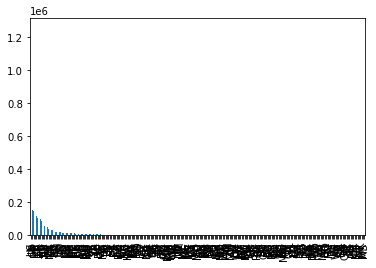

In [131]:
df["country_code"].value_counts().plot(kind='bar')

In [91]:
reviews_data[10]

{'rating': 4.0,
 'reviewerName': '森田さとこ',
 'reviewText': 'これから、私は予定に秋が一人で旅行の楽しいに宮城県登米市に行って泊まり来ますので思います❗☀',
 'categories': ['Budget Hotel'],
 'gPlusPlaceId': '116871469190387424406',
 'unixReviewTime': 1389191801,
 'reviewTime': 'Jan 8, 2014',
 'gPlusUserId': '100000021336848867366'}

In [10]:
# remove places without gps coordinates
nremoved = 0
fixed_places_data = []
for p in tqdm(range(len(places_data))):
    if 'gps' not in places_data[p] or places_data[p]['gps'] == None:
        nremoved += 1
    else:
        fixed_places_data.append(places_data[p])

  0%|          | 0/3114353 [00:00<?, ?it/s]

In [11]:
nremoved

26951

In [12]:
# plotting on map
lat_lon = []
long_lat_dict = {
                    "Longitude" : [],
                    "Latitude" : []
                }
for p in tqdm(range(len(fixed_places_data))):
    long_lat_dict["Longitude"].append(fixed_places_data[p]['gps'][1])
    long_lat_dict["Latitude"].append(fixed_places_data[p]['gps'][0])
    lat_lon.append((fixed_places_data[p]['gps'][1], fixed_places_data[p]['gps'][0]))

  0%|          | 0/3087402 [00:00<?, ?it/s]

In [13]:
lat_lon[0]


(-117.003209, 33.703804)

In [32]:
df = pd.DataFrame(long_lat_dict)




In [33]:
geometry = [Point(xy) for xy in long_lat]
gdf = GeoDataFrame(df, geometry=geometry)



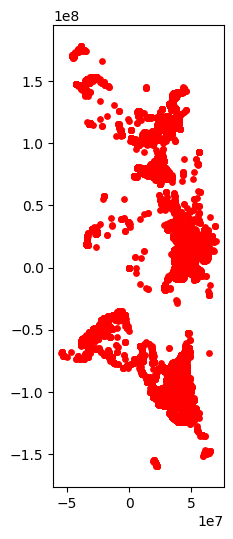

In [34]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);



/Users/vigneshnandakumar/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

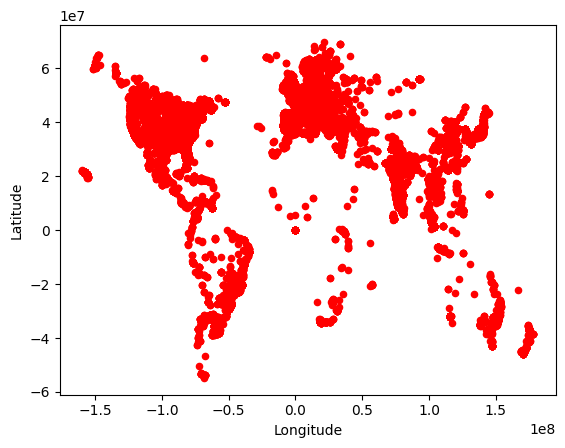

In [37]:
df.plot(x="Longitude", y="Latitude", kind="scatter", c="red",
        colormap="YlOrRd")

In [39]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))


In [41]:
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot: >

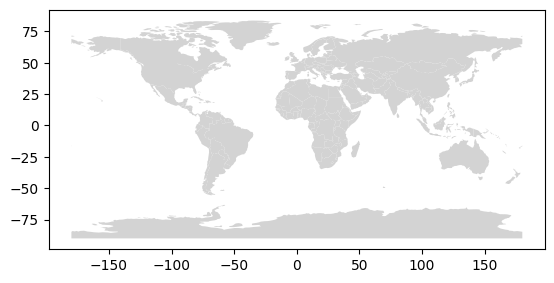

In [40]:
countries.plot(color="lightgrey")

In [9]:
places_data[0]

{'name': 'Diamond Valley Lake Marina',
 'price': None,
 'address': ['2615 Angler Ave', 'Hemet, CA 92545'],
 'hours': [['Monday', [['6:30 am--4:15 pm']]],
  ['Tuesday', [['6:30 am--4:15 pm']]],
  ['Wednesday', [['6:30 am--4:15 pm']], 1],
  ['Thursday', [['6:30 am--4:15 pm']]],
  ['Friday', [['6:30 am--4:15 pm']]],
  ['Saturday', [['6:30 am--4:15 pm']]],
  ['Sunday', [['6:30 am--4:15 pm']]]],
 'phone': '(951) 926-7201',
 'closed': False,
 'gPlusPlaceId': '104699454385822125632',
 'gps': [33.703804, -117.003209]}

In [14]:
import folium
mapit = None
for coord in tqdm(range(len(lat_lon))):
    mapit = folium.Map( location=[ lat_lon[coord][0], lat_lon[coord][1] ] )

mapit.save( 'map.html')




  0%|          | 0/3087402 [00:00<?, ?it/s]